# Loading the Datasets

After module imports, data is loaded into Pandas DataFrames for analysis and modelling.

In [34]:
# Module Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys

print("Numpy versions:", np.__version__)
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)
print("Python version:", sys.version)

Numpy versions: 1.26.2
Pandas version: 2.1.3
Seaborn version: 0.13.0
Python version: 3.9.10 (tags/v3.9.10:f2f3f53, Jan 17 2022, 15:14:21) [MSC v.1929 64 bit (AMD64)]


In [35]:
# Load Datasets into DataFrames
root = r'C:/Users/paulm/OneDrive/Cloudforest Technologies/M. Projects/crimson-hornbill/data/1_raw/'

client_df = pd.read_csv(root+'client.csv')
elec_price_df = pd.read_csv(root+'electricity_prices.csv')
gas_price_df = pd.read_csv(root+'gas_prices.csv')
historic_weather_df = pd.read_csv(root+'historical_weather.csv')
forecast_weather_df = pd.read_csv(root+'forecast_weather.csv')

# Data Munging

Before exploring or modelling the data, it is important to fix any errors and ensure columns are presented in the correct datatype. 

In [36]:
# Fixing Datatypes - client.csv

print(client_df.head(2))

# Perform datetime conversion
client_df['date'] = pd.to_datetime(client_df['date'])

# Confirm final datatypes
client_cols = client_df.columns
for col in client_cols:

    print(col, ":", client_df[col].dtype)

   product_type  county  eic_count  installed_capacity  is_business  \
0             1       0        108              952.89            0   
1             2       0         17              166.40            0   

         date  data_block_id  
0  2021-09-01              2  
1  2021-09-01              2  
product_type : int64
county : int64
eic_count : int64
installed_capacity : float64
is_business : int64
date : datetime64[ns]
data_block_id : int64


In [37]:
# Fixing Datatypes - electricity_prices

print(elec_price_df.head(2))

# Perform datetime conversion
elec_price_df['forecast_date'] = pd.to_datetime(elec_price_df['forecast_date'])
elec_price_df['origin_date'] = pd.to_datetime(elec_price_df['origin_date'])

# Confirm final datatypes
elec_price_cols = elec_price_df.columns
for col in elec_price_cols:

    print(col, ":", elec_price_df[col].dtype)

         forecast_date  euros_per_mwh          origin_date  data_block_id
0  2021-09-01 00:00:00          92.51  2021-08-31 00:00:00              1
1  2021-09-01 01:00:00          88.90  2021-08-31 01:00:00              1
forecast_date : datetime64[ns]
euros_per_mwh : float64
origin_date : datetime64[ns]
data_block_id : int64


In [38]:
# Fixing Datatypes - gas_prices

print(gas_price_df.head(2))

# Perform datetime conversion
gas_price_df['forecast_date'] = pd.to_datetime(gas_price_df['forecast_date'])
gas_price_df['origin_date'] = pd.to_datetime(gas_price_df['origin_date'])

# Confirm final datatypes
gas_price_cols = gas_price_df.columns
for col in gas_price_cols:

    print(col, ":", gas_price_df[col].dtype)

  forecast_date  lowest_price_per_mwh  highest_price_per_mwh origin_date  \
0    2021-09-01                 45.23                  46.32  2021-08-31   
1    2021-09-02                 45.62                  46.29  2021-09-01   

   data_block_id  
0              1  
1              2  
forecast_date : datetime64[ns]
lowest_price_per_mwh : float64
highest_price_per_mwh : float64
origin_date : datetime64[ns]
data_block_id : int64


In [39]:
# Fixing Datatypes - historic_weather

print(historic_weather_df.head(2))

# Perform datetime conversion
historic_weather_df['datetime'] = pd.to_datetime(historic_weather_df['datetime'])   # This is UTC

# Confirm final datatypes
historic_weather_cols = historic_weather_df.columns
for col in historic_weather_cols:

    print(col, ":", historic_weather_df[col].dtype)

              datetime  temperature  dewpoint  rain  snowfall  \
0  2021-09-01 00:00:00         14.4      12.0   0.0       0.0   
1  2021-09-01 00:00:00         14.0      12.0   0.0       0.0   

   surface_pressure  cloudcover_total  cloudcover_low  cloudcover_mid  \
0            1015.8                 4               4               0   
1            1010.6                 7               8               0   

   cloudcover_high  windspeed_10m  winddirection_10m  shortwave_radiation  \
0                0       6.694444                  3                  0.0   
1                0       4.944444                353                  0.0   

   direct_solar_radiation  diffuse_radiation  latitude  longitude  \
0                     0.0                0.0      57.6       21.7   
1                     0.0                0.0      57.6       22.2   

   data_block_id  
0              1  
1              1  
datetime : datetime64[ns]
temperature : float64
dewpoint : float64
rain : float64
snowf

In [40]:
# Fixing Datatypes - forecast_weather

print(forecast_weather_df.head(2))

# Perform datetime conversion
forecast_weather_df['origin_datetime'] = pd.to_datetime(forecast_weather_df['origin_datetime'])         # This is UTC
forecast_weather_df['forecast_datetime'] = pd.to_datetime(forecast_weather_df['forecast_datetime'])     # This is UTC

# Confirm final datatypes
forecast_weather_cols = forecast_weather_df.columns
for col in forecast_weather_cols:

    print(col, ":", forecast_weather_df[col].dtype)

   latitude  longitude            origin_datetime  hours_ahead  temperature  \
0      57.6       21.7  2021-09-01 00:00:00+00:00            1    15.655786   
1      57.6       22.2  2021-09-01 00:00:00+00:00            1    13.003931   

    dewpoint  cloudcover_high  cloudcover_low  cloudcover_mid  \
0  11.553613         0.904816        0.019714             0.0   
1  10.689844         0.886322        0.004456             0.0   

   cloudcover_total  10_metre_u_wind_component  10_metre_v_wind_component  \
0          0.905899                  -0.411328                  -9.106137   
1          0.886658                   0.206347                  -5.355405   

   data_block_id          forecast_datetime  direct_solar_radiation  \
0              1  2021-09-01 01:00:00+00:00                     0.0   
1              1  2021-09-01 01:00:00+00:00                     0.0   

   surface_solar_radiation_downwards  snowfall  total_precipitation  
0                                0.0       0.0    

latitude : float64
longitude : float64
origin_datetime : datetime64[ns, UTC]
hours_ahead : int64
temperature : float64
dewpoint : float64
cloudcover_high : float64
cloudcover_low : float64
cloudcover_mid : float64
cloudcover_total : float64
10_metre_u_wind_component : float64
10_metre_v_wind_component : float64
data_block_id : int64
forecast_datetime : datetime64[ns, UTC]
direct_solar_radiation : float64
surface_solar_radiation_downwards : float64
snowfall : float64
total_precipitation : float64


# Feature Engineering

In [41]:
# Client Data - Adding Month-Year
client_df['month_year'] = client_df['date'].dt.strftime('%Y-%m')

client_df.head(3)

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id,month_year
0,1,0,108,952.89,0,2021-09-01,2,2021-09
1,2,0,17,166.40,0,2021-09-01,2,2021-09
2,3,0,688,7207.88,0,2021-09-01,2,2021-09


# Exploratory Data Analysis

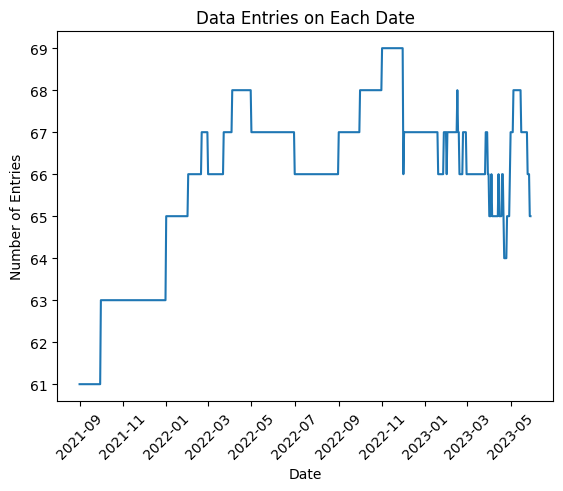

In [42]:
# Client dataset - Counting datapoints for each date

# Count entries for each date
data_counts = client_df.groupby('date').size().reset_index(name='count')

# Plot data entries as time-series
sns.lineplot(data=data_counts, x='date', y='count')

# Figure styling
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Number of Entries')
plt.title('Data Entries on Each Date')

plt.show()

In [43]:
# Exploring the client dataset

# Looking at how installed capacity changes
client_df

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id,month_year
0,1,0,108,952.89,0,2021-09-01,2,2021-09
1,2,0,17,166.40,0,2021-09-01,2,2021-09
2,3,0,688,7207.88,0,2021-09-01,2,2021-09
3,0,0,5,400.00,1,2021-09-01,2,2021-09
4,1,0,43,1411.00,1,2021-09-01,2,2021-09
...,...,...,...,...,...,...,...,...
41914,1,15,51,415.60,0,2023-05-29,637,2023-05
41915,3,15,161,2035.75,0,2023-05-29,637,2023-05
41916,0,15,15,620.00,1,2023-05-29,637,2023-05
41917,1,15,20,624.50,1,2023-05-29,637,2023-05


In [44]:
# Exploring the client dataset

# Product type code (contract type): 0 - Combined, 1 - Fixed, 2 - General Service, 3 - Spot

# Assess quantities of each contract type in dataset